In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Security Consultant,211000,USD,211000,US,0,US,M
1,2024,MI,FT,Security Consultant,142000,USD,142000,US,0,US,M
2,2024,MI,FT,Security Consultant,64417,GBP,80521,GB,0,GB,M
3,2024,MI,FT,Security Consultant,52584,GBP,65730,GB,0,GB,M
4,2024,MI,FT,Consultant,188400,USD,188400,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
22604,2020,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M
22605,2021,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L
22606,2021,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L
22607,2021,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L


In [3]:
display(df.head(10))

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Security Consultant,211000,USD,211000,US,0,US,M
1,2024,MI,FT,Security Consultant,142000,USD,142000,US,0,US,M
2,2024,MI,FT,Security Consultant,64417,GBP,80521,GB,0,GB,M
3,2024,MI,FT,Security Consultant,52584,GBP,65730,GB,0,GB,M
4,2024,MI,FT,Consultant,188400,USD,188400,US,0,US,M
5,2024,MI,FT,Consultant,125600,USD,125600,US,0,US,M
6,2024,MI,FT,Manager,246400,USD,246400,US,0,US,M
7,2024,MI,FT,Manager,117300,USD,117300,US,0,US,M
8,2024,MI,FT,Security Engineer,200200,USD,200200,US,0,US,M
9,2024,MI,FT,Security Engineer,190000,USD,190000,US,0,US,M


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22609 entries, 0 to 22608
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           22609 non-null  int64 
 1   experience_level    22609 non-null  object
 2   employment_type     22609 non-null  object
 3   job_title           22609 non-null  object
 4   salary              22609 non-null  int64 
 5   salary_currency     22609 non-null  object
 6   salary_in_usd       22609 non-null  int64 
 7   employee_residence  22609 non-null  object
 8   remote_ratio        22609 non-null  int64 
 9   company_location    22609 non-null  object
 10  company_size        22609 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.9+ MB
None


In [5]:
print('Shape of the DataFrame (rows/columns):', df.shape)

Shape of the DataFrame (rows/columns): (22609, 11)


In [6]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(9333)

In [8]:
df = df.drop_duplicates()
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Security Consultant,211000,USD,211000,US,0,US,M
1,2024,MI,FT,Security Consultant,142000,USD,142000,US,0,US,M
2,2024,MI,FT,Security Consultant,64417,GBP,80521,GB,0,GB,M
3,2024,MI,FT,Security Consultant,52584,GBP,65730,GB,0,GB,M
4,2024,MI,FT,Consultant,188400,USD,188400,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
22604,2020,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M
22605,2021,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L
22606,2021,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L
22607,2021,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L


In [9]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Security Consultant,211000,USD,211000,US,0,US,M
1,2024,MI,FT,Security Consultant,142000,USD,142000,US,0,US,M
2,2024,MI,FT,Security Consultant,64417,GBP,80521,GB,0,GB,M
3,2024,MI,FT,Security Consultant,52584,GBP,65730,GB,0,GB,M
4,2024,MI,FT,Consultant,188400,USD,188400,US,0,US,M
5,2024,MI,FT,Consultant,125600,USD,125600,US,0,US,M
6,2024,MI,FT,Manager,246400,USD,246400,US,0,US,M
7,2024,MI,FT,Manager,117300,USD,117300,US,0,US,M
8,2024,MI,FT,Security Engineer,200200,USD,200200,US,0,US,M
9,2024,MI,FT,Security Engineer,190000,USD,190000,US,0,US,M


In [10]:
display(df.describe())

,work_year,salary,salary_in_usd,remote_ratio
count,13276.000000,1.327600e+04,13276.000000,13276.000000
mean,2023.557096,2.336964e+05,142650.373682,28.547755
std,0.865132,6.783702e+06,65424.434329,44.438663
min,2020.000000,1.506100e+04,15061.000000,0.000000
25%,2023.000000,9.600000e+04,95800.000000,0.000000
50%,2024.000000,1.330000e+05,132145.000000,0.000000
75%,2024.000000,1.800000e+05,179431.000000,100.000000
max,2024.000000,6.000000e+08,720000.000000,100.000000


In [11]:
display(df.describe(include = 'object'))

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,13276,13276,13276,13276,13276,13276,13276
unique,4,4,254,22,79,77,3
top,SE,FT,Security Engineer,USD,US,US,M
freq,7161,13196,2970,12292,11544,11582,11872


# **The ratio of work experience and salary**

In [12]:
df_sub = df[['work_year', 'salary_in_usd', 'experience_level']].copy()
df_sub.head(10)

,work_year,salary_in_usd,experience_level
0,2024,211000,MI
1,2024,142000,MI
2,2024,80521,MI
3,2024,65730,MI
4,2024,188400,MI
5,2024,125600,MI
6,2024,246400,MI
7,2024,117300,MI
8,2024,200200,MI
9,2024,190000,MI


In [13]:
salary_exp = df_sub.groupby('experience_level')['salary_in_usd'].mean().reset_index()

salary_exp.head(10)

,experience_level,salary_in_usd
0,EN,97518.647552
1,EX,201395.871690
2,MI,125673.922985
3,SE,157577.557464


C:\Users\Admin\AppData\Local\Temp\ipykernel_2256\1923038731.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = salary_exp['experience_level'], y = salary_exp['salary_in_usd'], palette = 'plasma')


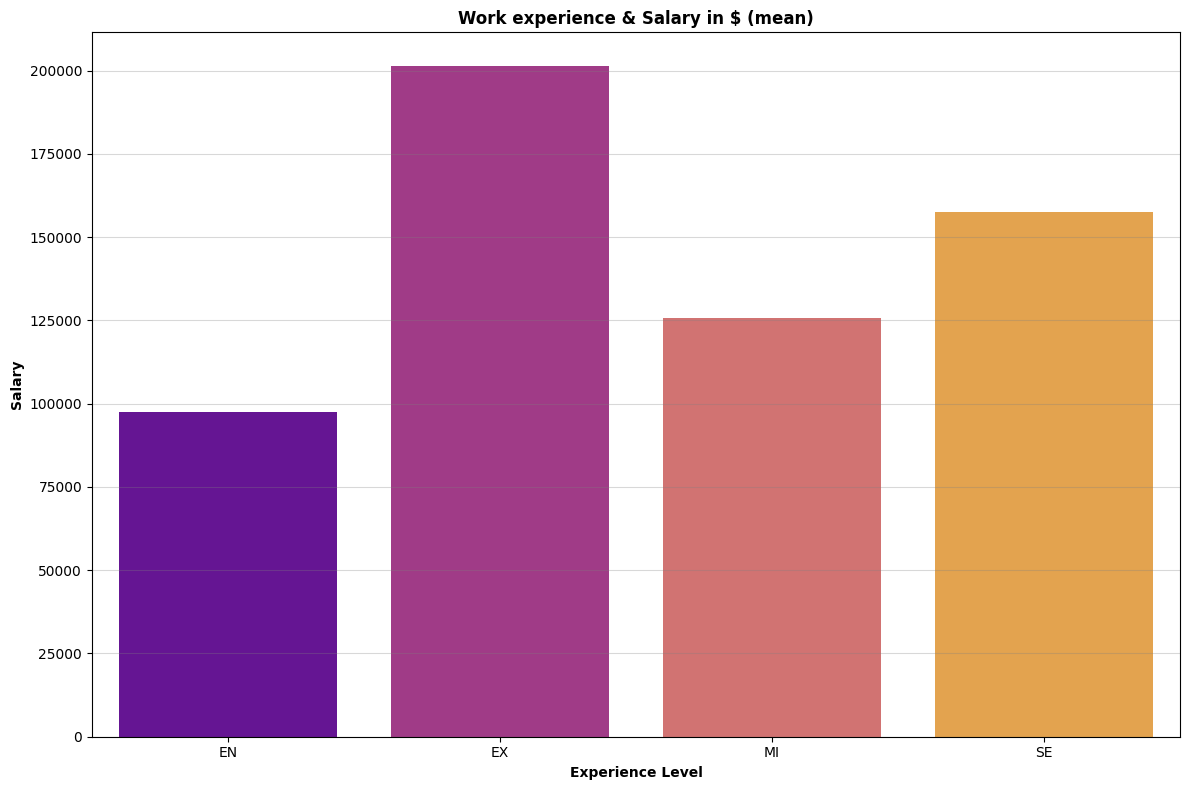

In [14]:
plt.figure(figsize = (12,8))
sns.barplot(x = salary_exp['experience_level'], y = salary_exp['salary_in_usd'], palette = 'plasma')

plt.title('Work experience & Salary in $ (mean)', fontweight = 'bold')
plt.xlabel('Experience Level', fontweight='bold')
plt.ylabel('Salary', fontweight='bold')

plt.grid(True, axis = 'y', color = 'grey', alpha = 0.3)

plt.tight_layout()
plt.show()

In [15]:
salary_exp

,experience_level,salary_in_usd
0,EN,97518.647552
1,EX,201395.871690
2,MI,125673.922985
3,SE,157577.557464


In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

salary_exp['experience_level_encoded'] = label_encoder.fit_transform(salary_exp['experience_level'])
salary_exp['experience_level_encoded']

0    0
1    1
2    2
3    3
Name: experience_level_encoded, dtype: int64

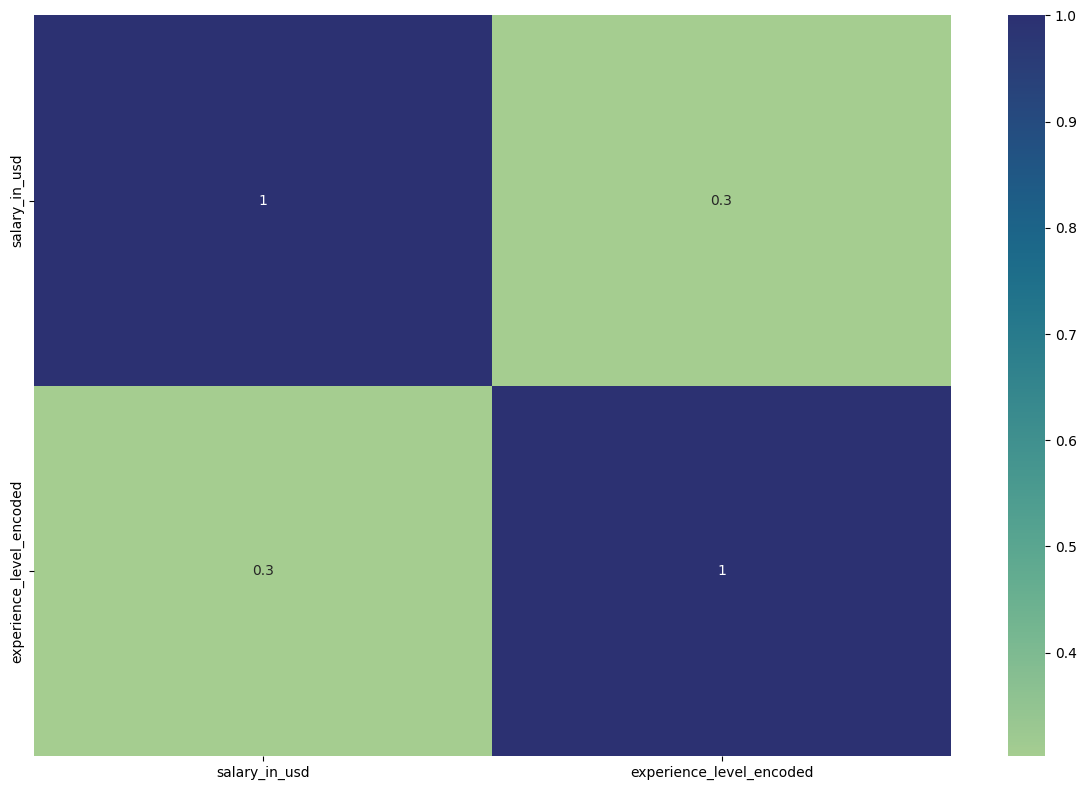

In [17]:
plt.figure(figsize = (12,8))
sns.heatmap(salary_exp.corr(numeric_only = True), annot = True, cmap = 'crest')

plt.tight_layout()
plt.show()

# Forms of work

In [18]:
df_sub2 = df[['employment_type', 'job_title', 'remote_ratio', 'salary']].copy()
df_sub2.head(10)

,employment_type,job_title,remote_ratio,salary
0,FT,Security Consultant,0,211000
1,FT,Security Consultant,0,142000
2,FT,Security Consultant,0,64417
3,FT,Security Consultant,0,52584
4,FT,Consultant,0,188400
5,FT,Consultant,0,125600
6,FT,Manager,0,246400
7,FT,Manager,0,117300
8,FT,Security Engineer,0,200200
9,FT,Security Engineer,0,190000


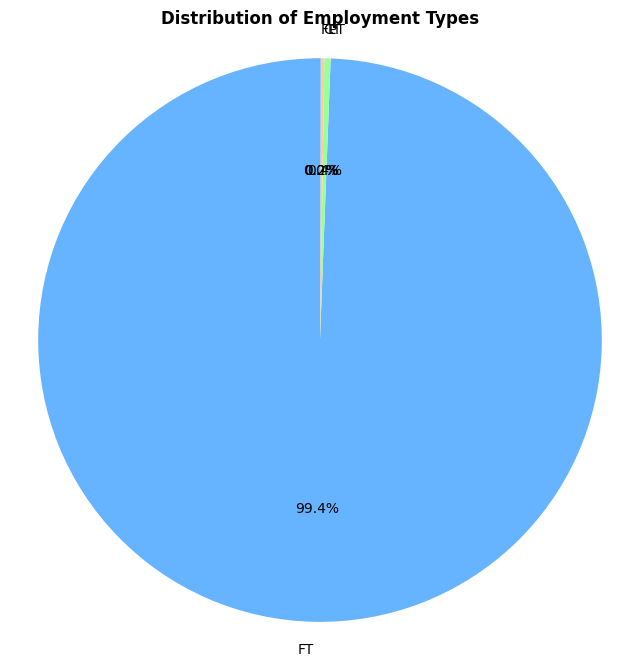

In [19]:
employment_type_counts = df_sub2['employment_type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(employment_type_counts, labels=employment_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribution of Employment Types', fontweight='bold')

plt.axis('equal')

plt.show()

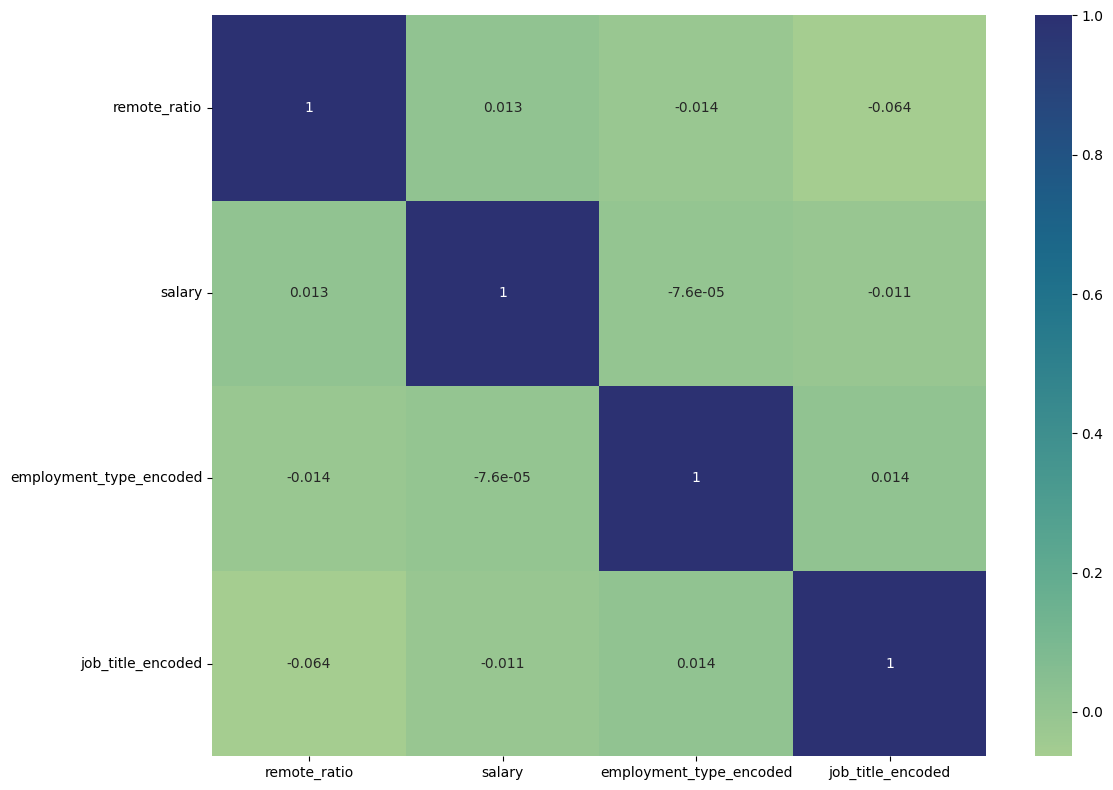

In [20]:
df_sub2['employment_type_encoded'] = label_encoder.fit_transform(df_sub2['employment_type'])
df_sub2['job_title_encoded'] = label_encoder.fit_transform(df_sub2['job_title'])

plt.figure(figsize = (12,8))
sns.heatmap(df_sub2.corr(numeric_only = True), annot = True, cmap = 'crest')

plt.tight_layout()
plt.show()

In [43]:
df_sub2['job_title_encoded']

0        189
1        189
2        189
3        189
4         21
        ... 
22604     39
22605    121
22606    150
22607    110
22608    242
Name: job_title_encoded, Length: 13276, dtype: int64

In [42]:
df_sub2['job_title_encoded'].value_counts()

job_title_encoded
193    2970
183    1074
185     461
122     378
213     375
       ... 
241       1
76        1
22        1
135       1
20        1
Name: count, Length: 254, dtype: int64

In [45]:
df_sub2['employment_type_encoded'].value_counts()

employment_type_encoded
2    13196
3       47
0       28
1        5
Name: count, dtype: int64

In [49]:
salary_exp['experience_level_encoded'].value_counts()

experience_level_encoded
0    1
1    1
2    1
3    1
Name: count, dtype: int64

# Location and remote work

In [21]:
df_sub3 = df[['company_location', 'remote_ratio', 'salary_in_usd']].copy()

df_sub3.head(10)

,company_location,remote_ratio,salary_in_usd
0,US,0,211000
1,US,0,142000
2,GB,0,80521
3,GB,0,65730
4,US,0,188400
5,US,0,125600
6,US,0,246400
7,US,0,117300
8,US,0,200200
9,US,0,190000


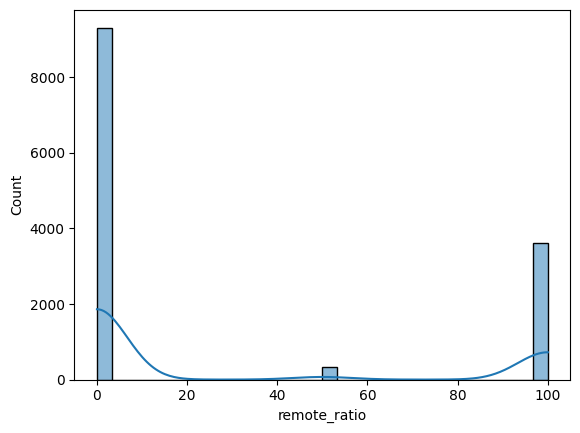

In [22]:
sns.histplot(df_sub3['remote_ratio'], kde = True, bins = 30)

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2256\3050009184.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = rem_rat_salaty.index, y = rem_rat_salaty, palette = 'viridis')


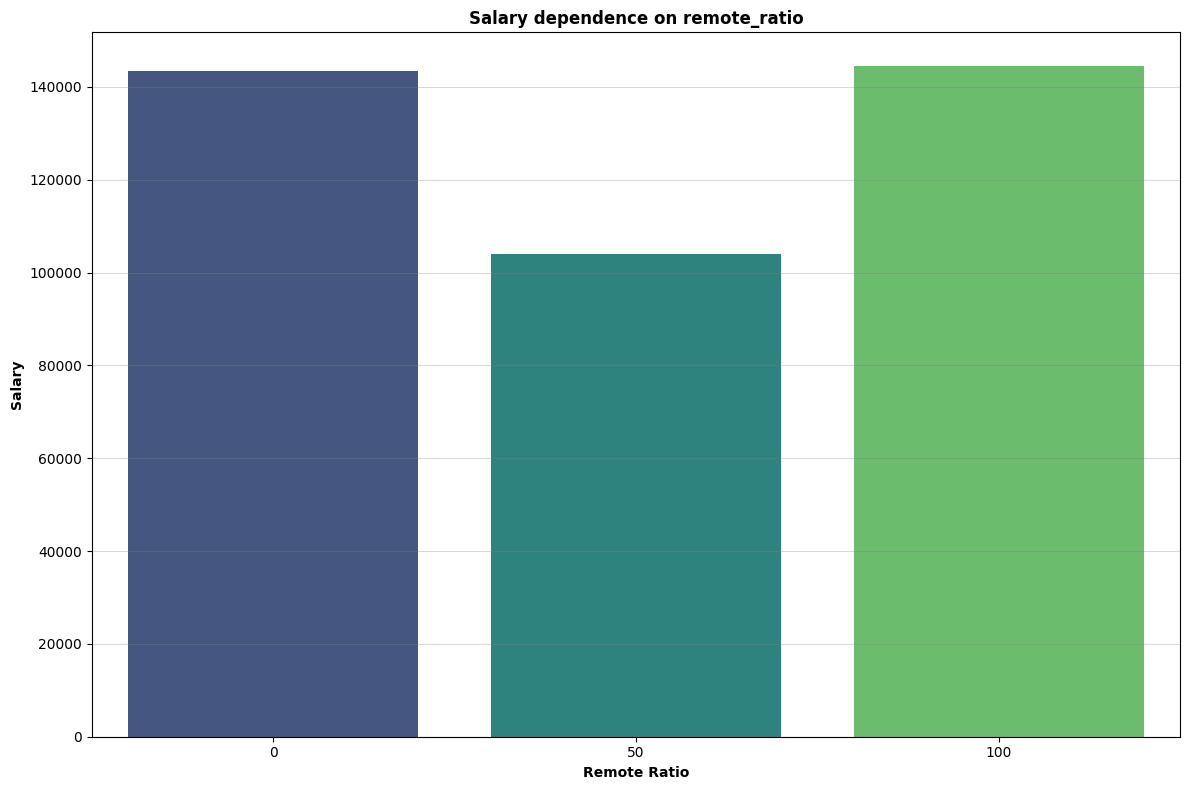

In [23]:
rem_rat_salaty = df_sub3.groupby('remote_ratio')['salary_in_usd'].mean()

plt.figure(figsize = (12,8))
sns.barplot(x = rem_rat_salaty.index, y = rem_rat_salaty, palette = 'viridis')

plt.title('Salary dependence on remote_ratio', fontweight = 'bold')
plt.ylabel('Salary', fontweight = 'bold')
plt.xlabel('Remote Ratio', fontweight = 'bold')

plt.grid(True, axis = 'y', color = 'grey', alpha = 0.3)

plt.tight_layout()
plt.show()

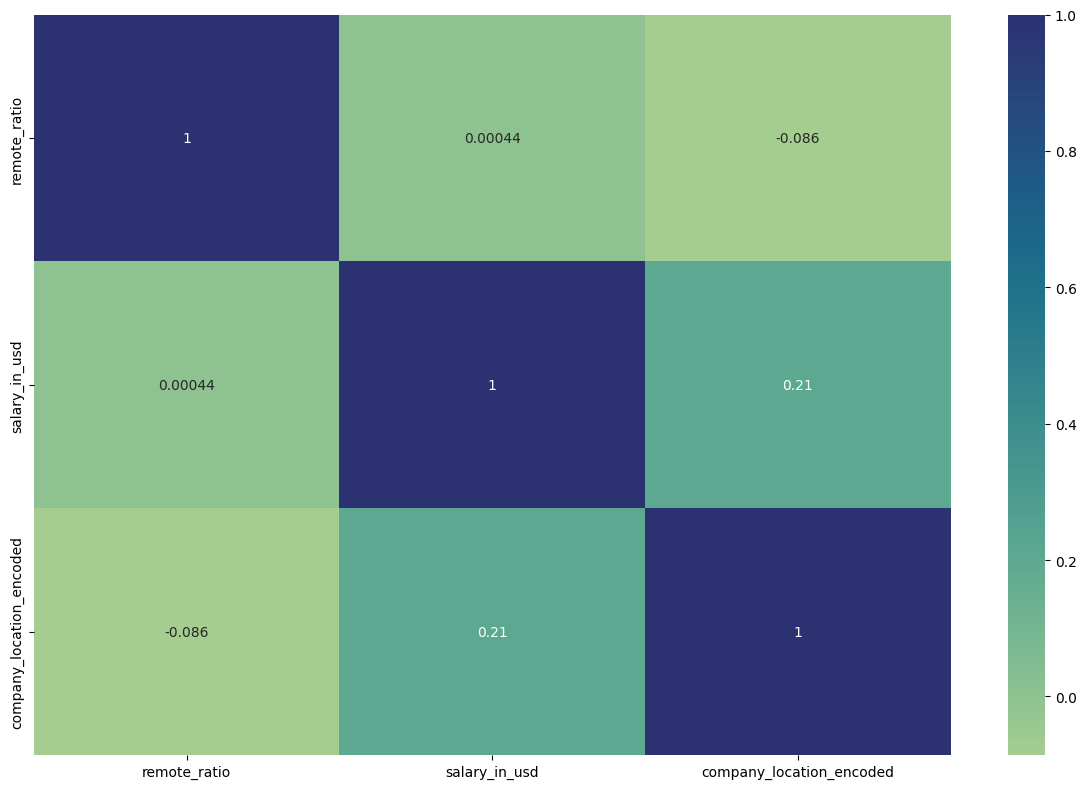

In [24]:
df_sub3['company_location_encoded'] = label_encoder.fit_transform(df_sub3['company_location'])

plt.figure(figsize = (12,8))
sns.heatmap(df_sub3.corr(numeric_only = True), annot = True, cmap = 'crest')

plt.tight_layout()
plt.show()

In [25]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Security Consultant,211000,USD,211000,US,0,US,M
1,2024,MI,FT,Security Consultant,142000,USD,142000,US,0,US,M
2,2024,MI,FT,Security Consultant,64417,GBP,80521,GB,0,GB,M
3,2024,MI,FT,Security Consultant,52584,GBP,65730,GB,0,GB,M
4,2024,MI,FT,Consultant,188400,USD,188400,US,0,US,M
5,2024,MI,FT,Consultant,125600,USD,125600,US,0,US,M
6,2024,MI,FT,Manager,246400,USD,246400,US,0,US,M
7,2024,MI,FT,Manager,117300,USD,117300,US,0,US,M
8,2024,MI,FT,Security Engineer,200200,USD,200200,US,0,US,M
9,2024,MI,FT,Security Engineer,190000,USD,190000,US,0,US,M


In [26]:
df_enc = df.copy()

df_enc['job_title'] = label_encoder.fit_transform(df['job_title'])

df_enc['experience_level'] = label_encoder.fit_transform(df['experience_level'])

df_enc['employment_type'] = label_encoder.fit_transform(df['employment_type'])

df_enc['salary_currency'] = label_encoder.fit_transform(df['salary_currency'])
df_enc['employee_residence'] = label_encoder.fit_transform(df['employee_residence'])
df_enc['company_location'] = label_encoder.fit_transform(df['company_location'])

df_enc['company_size'] = label_encoder.fit_transform(df['company_size'])

In [27]:
correlation = df_enc.corr()

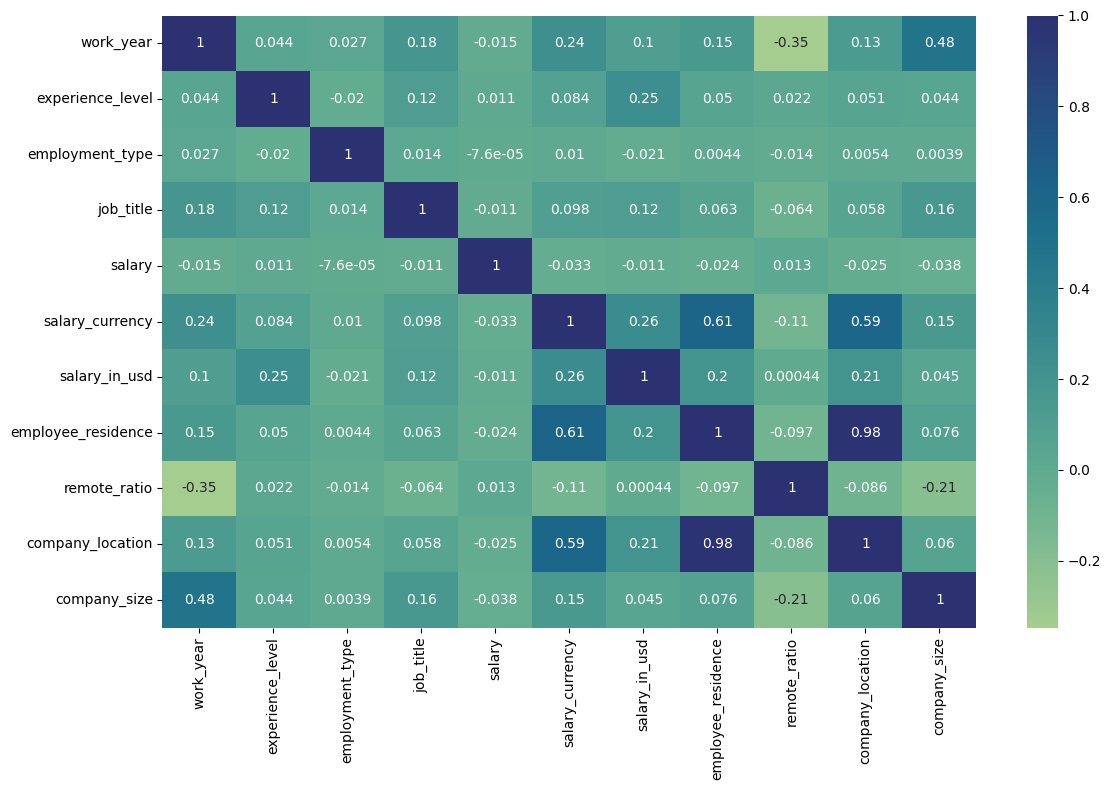

In [28]:
plt.figure(figsize = (12,8))
sns.heatmap(correlation, annot = True, cmap = 'crest')

plt.tight_layout()
plt.show()

In [29]:
correlation

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.044315,0.027263,0.178256,-0.015083,0.236286,0.103950,0.148409,-0.346694,0.132956,0.479525
experience_level,0.044315,1.000000,-0.020425,0.120954,0.010902,0.084069,0.247973,0.049898,0.021562,0.050617,0.043889
employment_type,0.027263,-0.020425,1.000000,0.014496,-0.000076,0.010126,-0.020565,0.004371,-0.014494,0.005443,0.003881
job_title,0.178256,0.120954,0.014496,1.000000,-0.010669,0.098147,0.117071,0.062542,-0.063712,0.057921,0.155619
salary,-0.015083,0.010902,-0.000076,-0.010669,1.000000,-0.033163,-0.010931,-0.024177,0.013022,-0.024836,-0.037579
salary_currency,0.236286,0.084069,0.010126,0.098147,-0.033163,1.000000,0.264265,0.609955,-0.105842,0.591427,0.150114
salary_in_usd,0.103950,0.247973,-0.020565,0.117071,-0.010931,0.264265,1.000000,0.202987,0.000443,0.205049,0.044818
employee_residence,0.148409,0.049898,0.004371,0.062542,-0.024177,0.609955,0.202987,1.000000,-0.096864,0.979427,0.076153
remote_ratio,-0.346694,0.021562,-0.014494,-0.063712,0.013022,-0.105842,0.000443,-0.096864,1.000000,-0.086042,-0.209162
company_location,0.132956,0.050617,0.005443,0.057921,-0.024836,0.591427,0.205049,0.979427,-0.086042,1.000000,0.060014


# Prediction

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

forest1 = RandomForestRegressor()

X = df_enc.drop('salary_in_usd', axis = 1)
y = df_enc['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
forest1.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
forest1.score(X_test, y_test)

0.9964646171263983

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
scorer = make_scorer(mean_squared_error, greater_is_better=False)

random_search = RandomizedSearchCV(forest1, param_distributions=param_dist, scoring=scorer, n_iter=10, cv=5, n_jobs=-1)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("The best parameters:", best_params)

best_model = random_search.best_estimator_

The best parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


In [34]:
best_model

,n_estimators,50
,criterion,'squared_error'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
best_model.fit(X_train, y_train)
predictions2 = best_model.predict(X_test)

In [36]:
best_model.score(X_test, y_test)

0.9966937152938508

In [37]:
mse = mean_squared_error(y_test, predictions2)
mae = mean_absolute_error(y_test, predictions2)

print(f"Root mean square error: {mse}")
print(f"Mean absolute error value (MAE): {mae}")

Root mean square error: 14132672.47507696
Mean absolute error value (MAE): 440.57249246987953


In [38]:
import pickle

In [39]:
import pickle

# Make sure 'best_model' is trained before saving
with open("model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Model saved successfully.")


Model saved successfully.


In [40]:
# Load the model
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Test the loaded model
y_pred = loaded_model.predict(X_test)
print("Predictions:", y_pred)


Predictions: [ 66000.    62010.   142000.   ... 115000.   165570.36  75000.  ]
